In [1]:
# Declaracion de librerias
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#Preparacion de las etiquetas, el dataset, y cargado del modelo para generar los datos para la matriz
names = ['Afroecuatoriano','Europeo','Blanco','Mestizo']
test_data_dir = './drive/MyDrive/DatasetX/test'
test_datagen = ImageDataGenerator()
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(150, 150),
    batch_size = 10,
    class_mode='categorical',
    shuffle=False)
custom_Model= load_model("drive/MyDrive/modeloTFX/model.h5")
predictions = custom_Model.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)
y_real = test_generator.classes

Found 89 images belonging to 4 classes.
9/9 [==============================] - 35s 4s/step


In [5]:
#Creacion de la matriz de confucion
matc=confusion_matrix(y_real, y_pred)

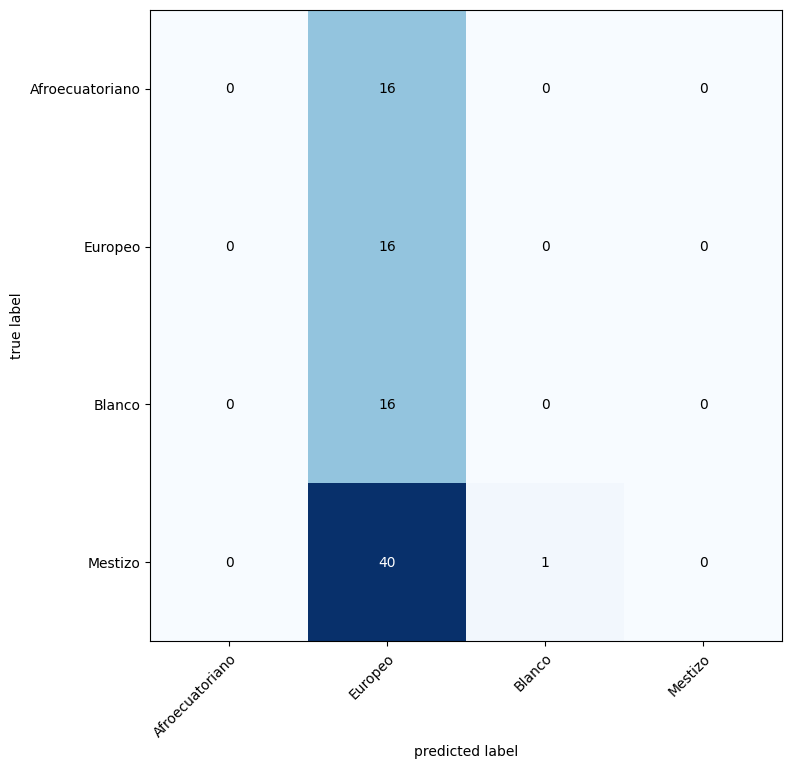

In [6]:
#Visualizacion de la matriz de confusion
plot_confusion_matrix(conf_mat=matc, figsize=(8,8), class_names = names, show_normed=False)
plt.tight_layout()

In [ ]:
#Impresion de metricas generadas por la matriz segun las clases existentes en el dataset
print(metrics.classification_report(y_real, y_pred, digits=2, zero_division=0))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        16
           3       0.46      1.00      0.63        41

    accuracy                           0.46        89
   macro avg       0.12      0.25      0.16        89
weighted avg       0.21      0.46      0.29        89

